In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
class TaiESM():
    def __init__(self, data):
        self.data = xr.open_dataset(data)
        
        self.LON = self.getVar("lon")
        self.LAT = self.getVar("lat")
        self.LON2, self.LAT2 = np.meshgrid(self.LON, self.LAT)
        self.LEV_PRE = self.getLevPre()
    
    def getVar(self, var):
        if type(var) == str:
            return self.data[var].to_numpy()
        elif type(var) == list or type(var) == np.ndarray:
            retVal = []
            for i in range(len(var)):
                retVal.append(self.data[var[i]].to_numpy())
            return retVal
        
    def getLevPre(self):
        PS_tile = np.tile(self.getVar("PS"), (30, 1, 1))
        hybm_tile = np.tile(self.getVar("hybm"), (192, 288, 1)).swapaxes(0, 2).swapaxes(1, 2)
        PRS_lev = np.tile(self.getVar("P0")*self.getVar("hybm"), (192, 288, 1)).swapaxes(0, 2).swapaxes(1, 2) + PS_tile * hybm_tile
        return PRS_lev

In [30]:
precc, precl, prect = 0, 0, 0
precc_djf, precl_djf, prect_djf = 0, 0, 0
precc_jja, precl_jja, prect_jja = 0, 0, 0
for i in range(1, 13):
    tmp = str(i).zfill(2)
    model = TaiESM(f"/work/aaron900129/taiesm_work/archive/f09.F2000.Aaron_trigger_ex1/atm/hist/f09.F2000.Aaron_trigger_ex1.cam.h0.2010-{tmp}.nc")
    precc += model.getVar("PRECC")[0] * 3600000
    precl += model.getVar("PRECL")[0] * 3600000

    if i == 12 or i == 1 or i == 2:
        precc_djf += model.getVar("PRECC")[0] * 3600000
        precl_djf += model.getVar("PRECL")[0] * 3600000

    if i == 6 or i == 7 or i == 8:
        precc_jja += model.getVar("PRECC")[0] * 3600000
        precl_jja += model.getVar("PRECL")[0] * 3600000


precc /= 12
precl /= 12
prect = precc + precl

precc_djf /= 3
precl_djf /= 3
prect_djf = precc_djf + precl_djf

precc_jja /= 3
precl_jja /= 3
prect_jja = precc_jja + precl_jja


In [34]:
precc_zm, precl_zm, prect_zm = 0, 0, 0
precc_zm_djf, precl_zm_djf, prect_zm_djf = 0, 0, 0
precc_zm_jja, precl_zm_jja, prect_zm_jja = 0, 0, 0
for i in range(1, 13):
    tmp = str(i).zfill(2)
    model = TaiESM(f"/work/aaron900129/taiesm_work/archive/f09.F2000.Aaron_trigger_ex2/atm/hist/f09.F2000.Aaron_trigger_ex2.cam.h0.2010-{tmp}.nc")
    precc_zm += model.getVar("PRECC")[0] * 3600000
    precl_zm += model.getVar("PRECL")[0] * 3600000

    if i == 12 or i == 1 or i == 2:
        precc_zm_djf += model.getVar("PRECC")[0] * 3600000
        precl_zm_djf += model.getVar("PRECL")[0] * 3600000

    if i == 6 or i == 7 or i == 8:
        precc_zm_jja += model.getVar("PRECC")[0] * 3600000
        precl_zm_jja += model.getVar("PRECL")[0] * 3600000


precc_zm /= 12
precl_zm /= 12
prect_zm = precc_zm + precl_zm

precc_zm_djf /= 3
precl_zm_djf /= 3
prect_zm_djf = precc_zm_djf + precl_zm_djf

precc_zm_jja /= 3
precl_zm_jja /= 3
prect_zm_jja = precc_zm_jja + precl_zm_jja

/work/aaron900129/miniconda/envs/Aaron/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/work/aaron900129/miniconda/envs/Aaron/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


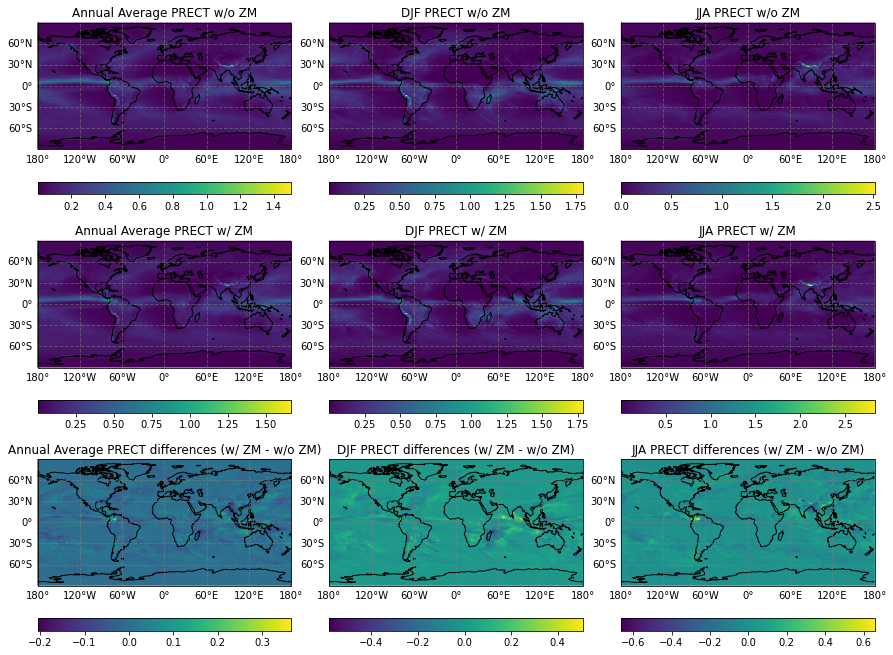

In [40]:
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(3, 3, figsize=(15, 12), subplot_kw={'projection': proj}, gridspec_kw = {'wspace':0.15, 'hspace':0.01})

cs = ax[0, 0].pcolormesh(model.LON2, model.LAT2, prect)
ax[0, 0].set_title("Annual Average PRECT w/o ZM")
ax[0, 0].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[0, 1].pcolormesh(model.LON2, model.LAT2, prect_djf)
ax[0, 1].set_title("DJF PRECT w/o ZM")
ax[0, 1].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[0, 2].pcolormesh(model.LON2, model.LAT2, prect_jja)
ax[0, 2].set_title("JJA PRECT w/o ZM")
ax[0, 2].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[1, 0].pcolormesh(model.LON2, model.LAT2, prect_zm)
ax[1, 0].set_title("Annual Average PRECT w/ ZM")
ax[1, 0].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[1, 1].pcolormesh(model.LON2, model.LAT2, prect_zm_djf)
ax[1, 1].set_title("DJF PRECT w/ ZM")
ax[1, 1].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[1, 2].pcolormesh(model.LON2, model.LAT2, prect_zm_jja)
ax[1, 2].set_title("JJA PRECT w/ ZM")
ax[1, 2].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[2, 0].pcolormesh(model.LON2, model.LAT2, prect_zm - prect)
ax[2, 0].set_title("Annual Average PRECT differences (w/ ZM - w/o ZM)")
ax[2, 0].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[2, 1].pcolormesh(model.LON2, model.LAT2, prect_zm_djf - prect_djf)
ax[2, 1].set_title("DJF PRECT differences (w/ ZM - w/o ZM)")
ax[2, 1].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[2, 2].pcolormesh(model.LON2, model.LAT2, prect_zm_jja - prect_jja)
ax[2, 2].set_title("JJA PRECT differences (w/ ZM - w/o ZM)")
ax[2, 2].coastlines()
plt.colorbar(cs, orientation='horizontal')

for i in range(3):
    for j in range(3):
        gl = ax[i, j].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                        linewidth=1, color='gray', alpha=0.5, linestyle='--')
        gl.xlabels_top = False
        gl.ylabels_right = False

plt.savefig("../graph/prect.png", dpi=200)

/work/aaron900129/miniconda/envs/Aaron/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/work/aaron900129/miniconda/envs/Aaron/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


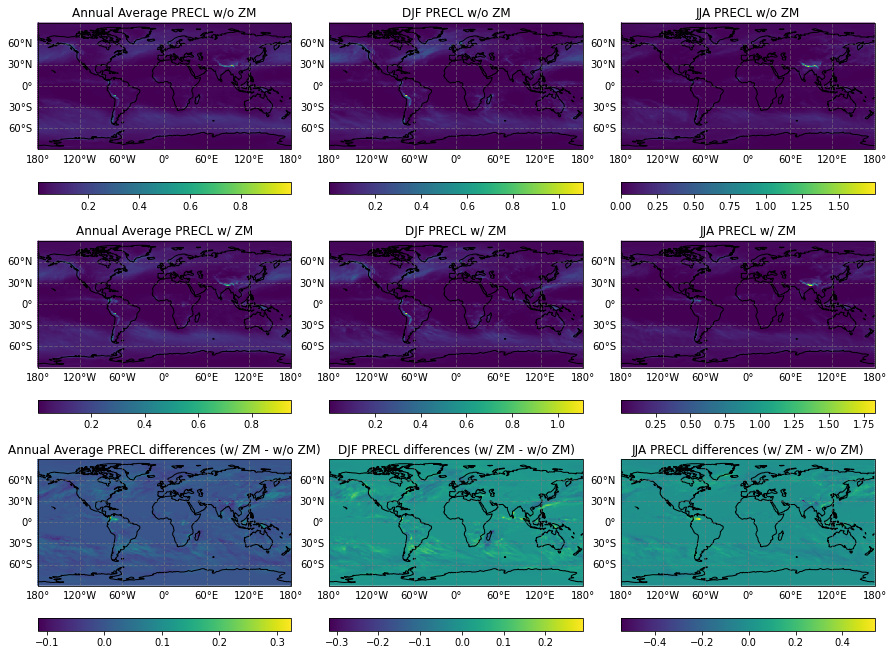

In [41]:
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(3, 3, figsize=(15, 12), subplot_kw={'projection': proj}, gridspec_kw = {'wspace':0.15, 'hspace':0.01})

cs = ax[0, 0].pcolormesh(model.LON2, model.LAT2, precl)
ax[0, 0].set_title("Annual Average PRECL w/o ZM")
ax[0, 0].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[0, 1].pcolormesh(model.LON2, model.LAT2, precl_djf)
ax[0, 1].set_title("DJF PRECL w/o ZM")
ax[0, 1].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[0, 2].pcolormesh(model.LON2, model.LAT2, precl_jja)
ax[0, 2].set_title("JJA PRECL w/o ZM")
ax[0, 2].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[1, 0].pcolormesh(model.LON2, model.LAT2, precl_zm)
ax[1, 0].set_title("Annual Average PRECL w/ ZM")
ax[1, 0].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[1, 1].pcolormesh(model.LON2, model.LAT2, precl_zm_djf)
ax[1, 1].set_title("DJF PRECL w/ ZM")
ax[1, 1].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[1, 2].pcolormesh(model.LON2, model.LAT2, precl_zm_jja)
ax[1, 2].set_title("JJA PRECL w/ ZM")
ax[1, 2].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[2, 0].pcolormesh(model.LON2, model.LAT2, precl_zm - precl)
ax[2, 0].set_title("Annual Average PRECL differences (w/ ZM - w/o ZM)")
ax[2, 0].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[2, 1].pcolormesh(model.LON2, model.LAT2, precl_zm_djf - precl_djf)
ax[2, 1].set_title("DJF PRECL differences (w/ ZM - w/o ZM)")
ax[2, 1].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[2, 2].pcolormesh(model.LON2, model.LAT2, precl_zm_jja - precl_jja)
ax[2, 2].set_title("JJA PRECL differences (w/ ZM - w/o ZM)")
ax[2, 2].coastlines()
plt.colorbar(cs, orientation='horizontal')

for i in range(3):
    for j in range(3):
        gl = ax[i, j].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                        linewidth=1, color='gray', alpha=0.5, linestyle='--')
        gl.xlabels_top = False
        gl.ylabels_right = False

plt.savefig("../graph/precl.png", dpi=200)

/work/aaron900129/miniconda/envs/Aaron/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/work/aaron900129/miniconda/envs/Aaron/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


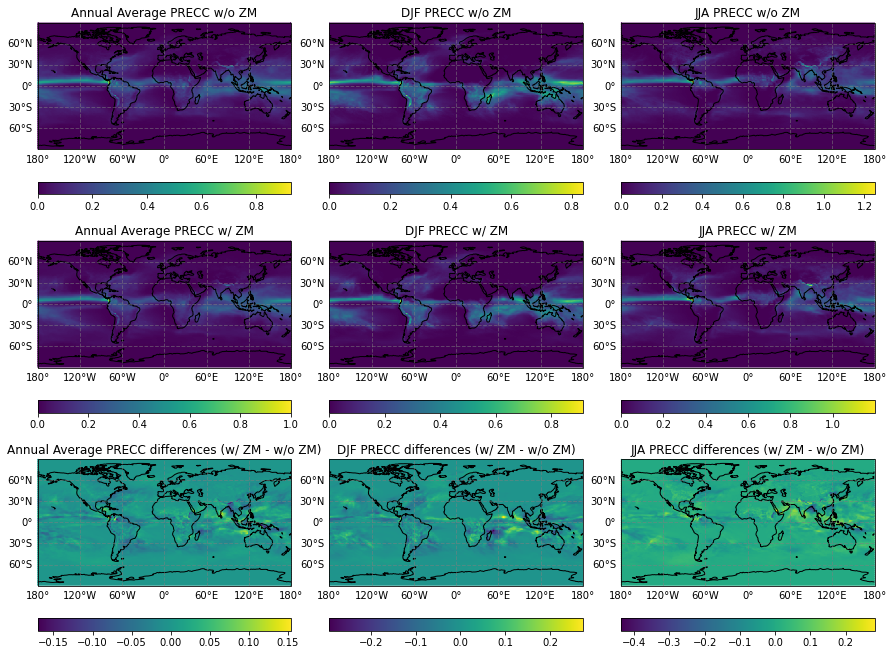

In [42]:
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(3, 3, figsize=(15, 12), subplot_kw={'projection': proj}, gridspec_kw = {'wspace':0.15, 'hspace':0.01})

cs = ax[0, 0].pcolormesh(model.LON2, model.LAT2, precc)
ax[0, 0].set_title("Annual Average PRECC w/o ZM")
ax[0, 0].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[0, 1].pcolormesh(model.LON2, model.LAT2, precc_djf)
ax[0, 1].set_title("DJF PRECC w/o ZM")
ax[0, 1].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[0, 2].pcolormesh(model.LON2, model.LAT2, precc_jja)
ax[0, 2].set_title("JJA PRECC w/o ZM")
ax[0, 2].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[1, 0].pcolormesh(model.LON2, model.LAT2, precc_zm)
ax[1, 0].set_title("Annual Average PRECC w/ ZM")
ax[1, 0].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[1, 1].pcolormesh(model.LON2, model.LAT2, precc_zm_djf)
ax[1, 1].set_title("DJF PRECC w/ ZM")
ax[1, 1].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[1, 2].pcolormesh(model.LON2, model.LAT2, precc_zm_jja)
ax[1, 2].set_title("JJA PRECC w/ ZM")
ax[1, 2].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[2, 0].pcolormesh(model.LON2, model.LAT2, precc_zm - precc)
ax[2, 0].set_title("Annual Average PRECC differences (w/ ZM - w/o ZM)")
ax[2, 0].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[2, 1].pcolormesh(model.LON2, model.LAT2, precc_zm_djf - precc_djf)
ax[2, 1].set_title("DJF PRECC differences (w/ ZM - w/o ZM)")
ax[2, 1].coastlines()
plt.colorbar(cs, orientation='horizontal')

cs = ax[2, 2].pcolormesh(model.LON2, model.LAT2, precc_zm_jja - precc_jja)
ax[2, 2].set_title("JJA PRECC differences (w/ ZM - w/o ZM)")
ax[2, 2].coastlines()
plt.colorbar(cs, orientation='horizontal')

for i in range(3):
    for j in range(3):
        gl = ax[i, j].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                        linewidth=1, color='gray', alpha=0.5, linestyle='--')
        gl.xlabels_top = False
        gl.ylabels_right = False

plt.savefig("../graph/precc.png", dpi=200)

In [26]:
count = 0
prect = 0
precc = 0
precl = 0
preccdzm = 0

shflx = 0
lhflx = 0
cape = 0
for m in [1, 2, 12]:
    for d in range(1, 31+1):
        if m == 2 and d > 28:
            continue
        m_tmp = str(m).zfill(2)
        d_tmp = str(d).zfill(2)
        ds = xr.open_dataset(f"/work/aaron900129/taiesm_work/archive/f09.F2000.Aaron_trigger_ex1/atm/hist/f09.F2000.Aaron_trigger_ex1.cam.h2.2010-{m_tmp}-{d_tmp}-00000.nc")
        prect += np.asarray(ds['PRECT_LON_80w_to_40w_LAT_30s_to_0s'][:, -5, 16]) * 3600000 #(300, -3.298)
        precc += np.asarray(ds['PRECC_LON_80w_to_40w_LAT_30s_to_0s'][:, -5, 16]) * 3600000 #(300, -3.298)
        precl += np.asarray(ds['PRECL_LON_80w_to_40w_LAT_30s_to_0s'][:, -5, 16]) * 3600000 #(300, -3.298)
        preccdzm += np.asarray(ds['PRECCDZM_LON_80w_to_40w_LAT_30s_to_0s'][:, -5, 16]) * 3600000 #(300, -3.298)

        shflx += np.asarray(ds['SHFLX_LON_80w_to_40w_LAT_30s_to_0s'][:, -5, 16]) #(300, -3.298)
        lhflx += np.asarray(ds['LHFLX_LON_80w_to_40w_LAT_30s_to_0s'][:, -5, 16]) #(300, -3.298)
        cape += np.asarray(ds['CAPE_LON_80w_to_40w_LAT_30s_to_0s'][:, -5, 16]) #(300, -3.298)

        count += 1

prect /= count
precc /= count
precl /= count
preccdzm /= count

shflx /= count
lhflx /= count
cape /= count

In [27]:
count = 0
prect_zm = 0
precc_zm = 0
precl_zm = 0
preccdzm_zm = 0

shflx_zm = 0
lhflx_zm = 0
cape_zm = 0
for m in [1, 2, 12]:
    for d in range(1, 31+1):
        if m == 2 and d > 28:
            continue
        m_tmp = str(m).zfill(2)
        d_tmp = str(d).zfill(2)
        ds = xr.open_dataset(f"/work/aaron900129/taiesm_work/archive/f09.F2000.Aaron_trigger_ex2/atm/hist/f09.F2000.Aaron_trigger_ex2.cam.h2.2010-{m_tmp}-{d_tmp}-00000.nc")
        prect_zm += np.asarray(ds['PRECT_LON_80w_to_40w_LAT_30s_to_0s'][:, -5, 16]) * 3600000 #(300, -3.298)
        precc_zm += np.asarray(ds['PRECC_LON_80w_to_40w_LAT_30s_to_0s'][:, -5, 16]) * 3600000 #(300, -3.298)
        precl_zm += np.asarray(ds['PRECL_LON_80w_to_40w_LAT_30s_to_0s'][:, -5, 16]) * 3600000 #(300, -3.298)
        preccdzm_zm += np.asarray(ds['PRECCDZM_LON_80w_to_40w_LAT_30s_to_0s'][:, -5, 16]) * 3600000 #(300, -3.298)

        shflx_zm += np.asarray(ds['SHFLX_LON_80w_to_40w_LAT_30s_to_0s'][:, -5, 16]) #(300, -3.298)
        lhflx_zm += np.asarray(ds['LHFLX_LON_80w_to_40w_LAT_30s_to_0s'][:, -5, 16]) #(300, -3.298)
        cape_zm += np.asarray(ds['CAPE_LON_80w_to_40w_LAT_30s_to_0s'][:, -5, 16]) #(300, -3.298)

        count += 1

prect_zm /= count
precc_zm /= count
precl_zm /= count
preccdzm_zm /= count

shflx_zm /= count
lhflx_zm /= count
cape_zm /= count

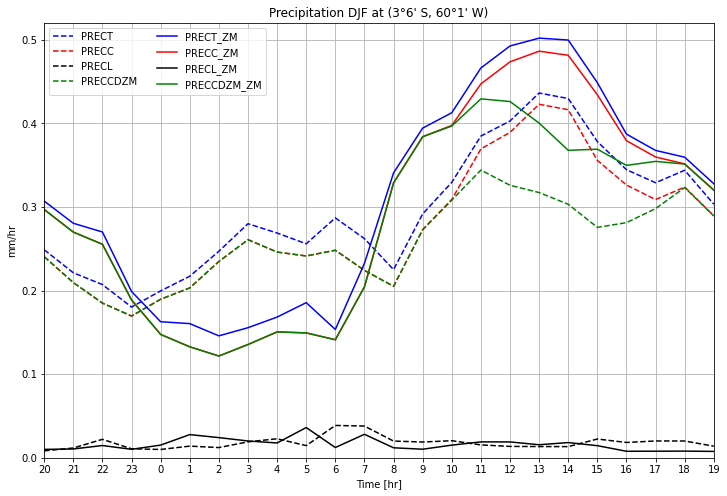

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(prect, color='b', ls='--')
plt.plot(precc, color='r', ls='--')
plt.plot(precl, color='k', ls='--')
plt.plot(preccdzm, color='g', ls='--')

plt.plot(prect_zm, color='b')
plt.plot(precc_zm, color='r')
plt.plot(precl_zm, color='k')
plt.plot(preccdzm_zm, color='g')
plt.legend(['PRECT', 'PRECC', 'PRECL', 'PRECCDZM', 'PRECT_ZM', 'PRECC_ZM', 'PRECL_ZM', 'PRECCDZM_ZM'], ncol=2)
plt.title("Precipitation DJF at (3°6' S, 60°1' W)")
plt.grid('--')
plt.xlim(0, 23)
plt.ylim(0, 0.52)
plt.xlabel("Time [hr]")
plt.ylabel("mm/hr")
plt.xticks(np.arange(0, 24), (np.arange(0, 24) - 4) % 24)
plt.savefig("../graph/Manaus_prec.png", dpi=200)

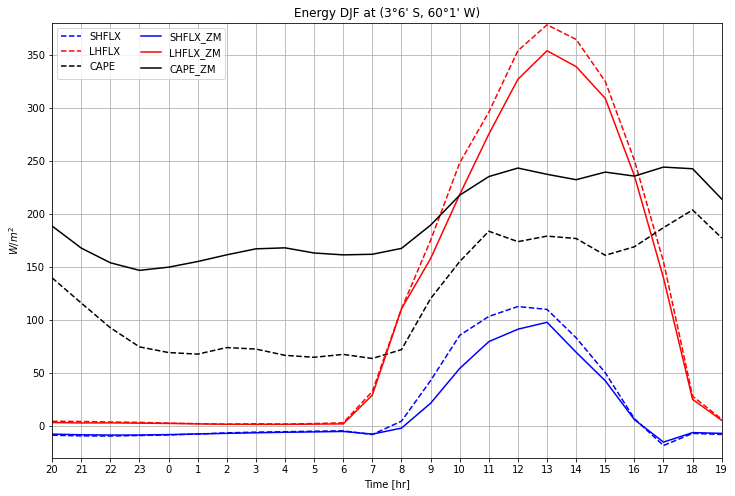

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(shflx, color='b', ls='--')
plt.plot(lhflx, color='r', ls='--')
plt.plot(cape, color='k', ls='--')

plt.plot(shflx_zm, color='b')
plt.plot(lhflx_zm, color='r')
plt.plot(cape_zm, color='k')

plt.legend(['SHFLX', 'LHFLX', 'CAPE', 'SHFLX_ZM', 'LHFLX_ZM', 'CAPE_ZM'], ncol=2)
plt.title("Energy DJF at (3°6' S, 60°1' W)")
plt.grid('--')
plt.xlim(0, 23)
plt.ylim(-30, 380)
plt.xlabel("Time [hr]")
plt.ylabel(r"$W/m^2$")
plt.xticks(np.arange(0, 24), (np.arange(0, 24) - 4) % 24)
plt.savefig("../graph/Manaus_cape.png", dpi=200)

In [11]:
count = 0
prect = 0
precc = 0
precl = 0
preccdzm = 0

shflx = 0
lhflx = 0
cape = 0
for m in [7, 8, 9]:
    for d in range(1, 31+1):
        if m == 9 and d > 30:
            continue
        m_tmp = str(m).zfill(2)
        d_tmp = str(d).zfill(2)
        ds = xr.open_dataset(f"/work/aaron900129/taiesm_work/archive/f09.F2000.Aaron_trigger_ex1/atm/hist/f09.F2000.Aaron_trigger_ex1.cam.h1.2010-{m_tmp}-{d_tmp}-00000.nc")
        prect += np.asarray(ds['PRECT_LON_110w_to_90w_LAT_30n_to_45n'][:, 7, 10]) * 3600000 #(262.5, 36.2827)
        precc += np.asarray(ds['PRECC_LON_110w_to_90w_LAT_30n_to_45n'][:, 7, 10]) * 3600000 #(262.5, 36.2827)
        precl += np.asarray(ds['PRECL_LON_110w_to_90w_LAT_30n_to_45n'][:, 7, 10]) * 3600000 #(262.5, 36.2827)
        preccdzm += np.asarray(ds['PRECCDZM_LON_110w_to_90w_LAT_30n_to_45n'][:, 7, 10]) * 3600000 #(262.5, 36.2827)

        shflx += np.asarray(ds['SHFLX_LON_110w_to_90w_LAT_30n_to_45n'][:, 7, 10]) #(262.5, 36.2827)
        lhflx += np.asarray(ds['LHFLX_LON_110w_to_90w_LAT_30n_to_45n'][:, 7, 10]) #(262.5, 36.2827)
        cape += np.asarray(ds['CAPE_LON_110w_to_90w_LAT_30n_to_45n'][:, 7, 10]) #(262.5, 36.2827)

        count += 1

prect /= count
precc /= count
precl /= count
preccdzm /= count

shflx /= count
lhflx /= count
cape /= count

In [17]:
count = 0
prect_zm = 0
precc_zm = 0
precl_zm = 0
preccdzm_zm = 0

shflx_zm = 0
lhflx_zm = 0
cape_zm = 0
for m in [7, 8, 9]:
    for d in range(1, 31+1):
        if m == 9 and d > 30:
            continue
        m_tmp = str(m).zfill(2)
        d_tmp = str(d).zfill(2)
        ds = xr.open_dataset(f"/work/aaron900129/taiesm_work/archive/f09.F2000.Aaron_trigger_ex2/atm/hist/f09.F2000.Aaron_trigger_ex2.cam.h1.2010-{m_tmp}-{d_tmp}-00000.nc")
        prect_zm += np.asarray(ds['PRECT_LON_110w_to_90w_LAT_30n_to_45n'][:, 7, 10]) * 3600000 #(262.5, 36.2827)
        precc_zm += np.asarray(ds['PRECC_LON_110w_to_90w_LAT_30n_to_45n'][:, 7, 10]) * 3600000 #(262.5, 36.2827)
        precl_zm += np.asarray(ds['PRECL_LON_110w_to_90w_LAT_30n_to_45n'][:, 7, 10]) * 3600000 #(262.5, 36.2827)
        preccdzm_zm += np.asarray(ds['PRECCDZM_LON_110w_to_90w_LAT_30n_to_45n'][:, 7, 10]) * 3600000 #(262.5, 36.2827)

        shflx_zm += np.asarray(ds['SHFLX_LON_110w_to_90w_LAT_30n_to_45n'][:, 7, 10]) #(262.5, 36.2827)
        lhflx_zm += np.asarray(ds['LHFLX_LON_110w_to_90w_LAT_30n_to_45n'][:, 7, 10]) #(262.5, 36.2827)
        cape_zm += np.asarray(ds['CAPE_LON_110w_to_90w_LAT_30n_to_45n'][:, 7, 10]) #(262.5, 36.2827)

        count += 1

prect_zm /= count
precc_zm /= count
precl_zm /= count
preccdzm_zm /= count

shflx_zm /= count
lhflx_zm /= count
cape_zm /= count

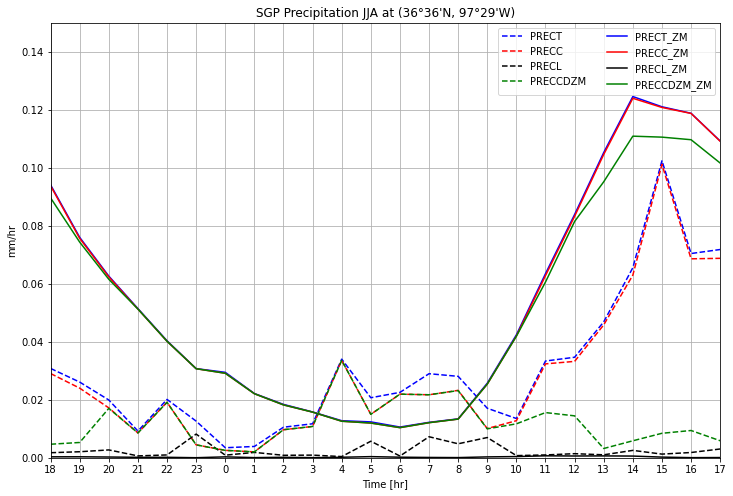

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(prect, color='b', ls='--')
plt.plot(precc, color='r', ls='--')
plt.plot(precl, color='k', ls='--')
plt.plot(preccdzm, color='g', ls='--')

plt.plot(prect_zm, color='b')
plt.plot(precc_zm, color='r')
plt.plot(precl_zm, color='k')
plt.plot(preccdzm_zm, color='g')
plt.legend(['PRECT', 'PRECC', 'PRECL', 'PRECCDZM', 'PRECT_ZM', 'PRECC_ZM', 'PRECL_ZM', 'PRECCDZM_ZM'], ncol=2)
plt.title("SGP Precipitation JJA at (36°36'N, 97°29'W)")
plt.grid('--')
plt.xlim(0, 23)
plt.ylim(0, 0.15)
plt.xlabel("Time [hr]")
plt.ylabel("mm/hr")
plt.xticks(np.arange(0, 24), (np.arange(0, 24) - 6) % 24)
plt.savefig("../graph/SGP_prec.png", dpi=200)

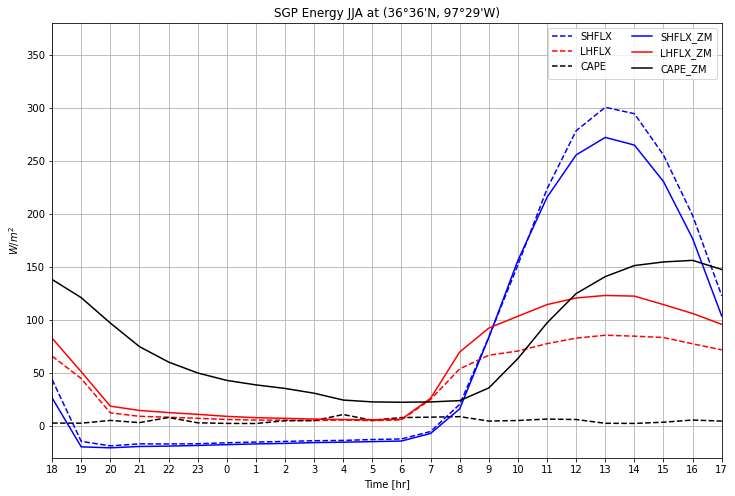

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(shflx, color='b', ls='--')
plt.plot(lhflx, color='r', ls='--')
plt.plot(cape, color='k', ls='--')

plt.plot(shflx_zm, color='b')
plt.plot(lhflx_zm, color='r')
plt.plot(cape_zm, color='k')

plt.legend(['SHFLX', 'LHFLX', 'CAPE', 'SHFLX_ZM', 'LHFLX_ZM', 'CAPE_ZM'], ncol=2)
plt.title("SGP Energy JJA at (36°36'N, 97°29'W)")
plt.grid('--')
plt.xlim(0, 23)
plt.ylim(-30, 380)
plt.xlabel("Time [hr]")
plt.ylabel(r"$W/m^2$")
plt.xticks(np.arange(0, 24), (np.arange(0, 24) - 6) % 24)
plt.savefig("../graph/SGP_cape.png", dpi=200)